# Functions

In [1]:
from tcc_markov_chain.base_simulation import Simulation
from tcc_markov_chain.simulations import MarkovChain, PeriodicDirectSampling
from typing import List
from tcc_markov_chain.systems import HDPeriodic,DiskSystem
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def hexagonal_positions(box,N, radius,spacing):
    Lx, Ly = box
    dx = spacing
    dy = np.sqrt(3)/2 * spacing
    n_cols = int(np.floor(Lx/dx))
    n_rows = int(np.floor(Ly/dy))
    if n_cols == 0 or n_rows == 0 or (n_cols*n_rows) < N:
        raise ValueError("box too small")
        
    pos = []
    for r in range(n_rows):
        y=r*dy
        x_offset=0.5 * spacing if r%2 else 0
        for c in range(n_cols):
            x = (c * dx + x_offset) % Lx
            pos.append((x,y))
            if len(pos)==N:
                return np.asarray(pos,dtype=float), (r+1, n_cols)
    
    raise RuntimeError("Wtf?")

In [3]:
# observables
from tcc_markov_chain.observables.hard_disk import particle_density, rdf

# Functions

In [4]:
class RDF():
    def __init__(
            self,
            box_size,
            n_bins=10,
        ):
        # self.system=system
        self.n_bins=n_bins
        self.bin_size = box_size / (2*n_bins)
        self.bins =np.zeros(n_bins+1)

    def eval(self, system:DiskSystem):
        distances = system.calculate_relative_positions()
        distances = np.linalg.norm(distances,axis=1)
        for d in distances:
            # print(d//self.bin_size, d, self.bin_size)
            if int(d//self.bin_size)==11:
                print(distances, system.positions)
            self.bins[int(d//self.bin_size)]+=2

        return True

In [5]:
class ProbabilityDensityPosition():
    def __init__(self, sim:Simulation,bin_size=1):
        self.box_dimension = sim.system.box_dimension
        self.bin_size = bin_size
        self.n_bins = (self.box_dimension // bin_size).astype(int)
        self.bins = np.zeros(self.n_bins,dtype=float)
        self.steps = 0

    def evaluate(self,sys:DiskSystem):
        idx = (sys.positions[1] // self.bin_size).astype(int)
        self.bins[idx[0],idx[1]]+=1
        
        self.steps+=1
        return self.bins
    
    def normalize_results(self):
        return self.bins / self.steps

# Main

In [6]:
pos = []
new_config = pos.copy()
new_config.append([1,2])
new_config = np.array(new_config,dtype=float)
print(new_config)

[[1. 2.]]


In [7]:
# a = np.array([[np.float64(0.0), np.float64(0.0)], [np.float64(3.8), np.float64(0.0)]]) - np.array([np.float64(7.6), np.float64(0.0)])
# a -= np.array([10,10]) * np.rint(a/np.array([10,10]))
# print(2*particle_radius)
# a 

In [8]:
Lx,Ly = np.array([10,10],dtype=float)

dx = 2*1.9
dy = np.sqrt(3)/2 * dx
print(dy)
Ly/dy

3.2908965343808667


np.float64(3.03868562731382)

In [9]:
a = np.array([[np.float64(0.0), np.float64(0.0)], [np.float64(3.8), np.float64(0.0)], [np.float64(1.9), np.float64(3.2908965343808667)], [np.float64(5.699999999999999), np.float64(3.2908965343808667)]])
test = np.array([[np.float64(3.8), np.float64(6.581793068761733)]])
dis = a - test
dis -= np.array([10,10]) * np.rint(dis/np.array([10,10]))
print(dis)
print(np.linalg.norm(dis,axis=1))

[[-3.8         3.41820693]
 [ 0.          3.41820693]
 [-1.9        -3.29089653]
 [ 1.9        -3.29089653]]
[5.11117781 3.41820693 3.8        3.8       ]


2025-07-17 14:18:30,265 - INFO - creting system with 6 particles of radii 1.8
2025-07-17 14:18:30,266 - INFO - density: 0.6107256118578558, box size [10. 10.]
2025-07-17 14:18:30,269 - INFO - system created


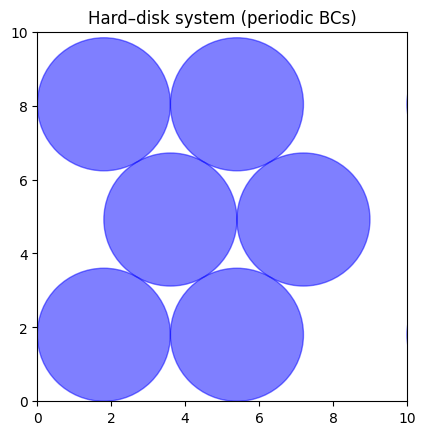

In [10]:
box_dimension=np.array([10,10],dtype=float)
n_particles=6
particle_radius=1.8
sys = HDPeriodic(
    particle_radius=particle_radius,
    n_particles=n_particles,
    box_dimension=box_dimension,
    initial_configuration_type='hexagonal_lattice'
    # positions=positions
)
sys.plot_system()

## Direct sampling - 2 particle problem

2025-07-17 14:18:30,357 - INFO - creting system with 2 particles of radii 0.65
2025-07-17 14:18:30,359 - INFO - density: 0.6636614480708438, box size [2. 2.]
2025-07-17 14:18:30,360 - INFO - system created


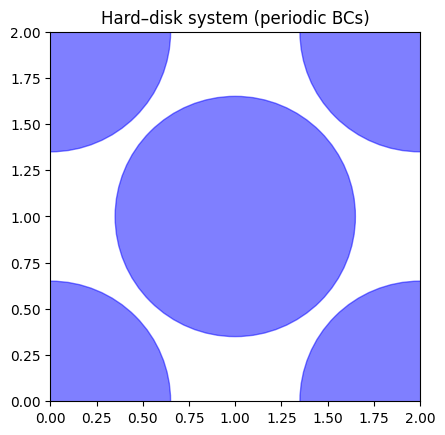

In [11]:
box_dimension=np.array([2,2],dtype=float)
n_particles=2
particle_radius=0.65
n_steps=int(1e3)
positions = np.array([[0,0],[1.,1]],dtype=float)
sys = HDPeriodic(particle_radius=particle_radius,n_particles=n_particles,positions=positions,box_dimension=box_dimension)
sys.plot_system()

In [12]:
sim = PeriodicDirectSampling(deepcopy(sys))
sim.system.positions
sim_pd = ProbabilityDensityPosition(sim,bin_size=2)
sim_run = sim.run(sim_pd.evaluate,n_steps=n_steps)

for step in sim_run:
    continue

100%|██████████| 1000/1000 [00:04<00:00, 228.86it/s]


## Markov Chain/Direct sampling Probabilitie density

In [25]:
dy = np.sqrt(3)/2 * 2.8
(1.4 + 3*dy) - 10

np.float64(-1.3253866082107155)

In [30]:
(np.sqrt(3)/2)

np.float64(0.8660254037844386)

In [35]:
Ly

np.float64(11.547005383792516)

2025-07-17 14:22:18,438 - INFO - creting system with 12 particles of radii 1.6
2025-07-17 14:22:18,439 - INFO - density: 0.8357987470391277, box size [10.         11.54700538]
2025-07-17 14:22:18,439 - WARNING - high density system. Initial state can take time to build
2025-07-17 14:22:18,442 - INFO - system created


10 11.547005383792516 2.8


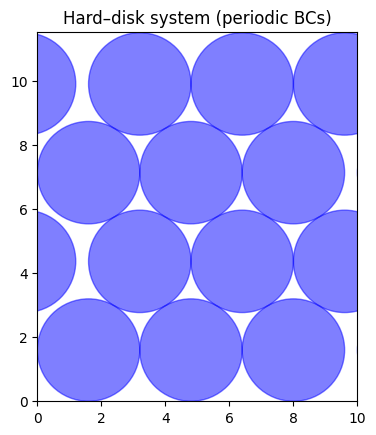

In [43]:
Lx = 10
Ly = (2 / np.sqrt(3))*Lx
box_dimension=np.array([Lx,Ly],dtype=float)
n_particles=12
particle_radius=1.6
sys = HDPeriodic(
    particle_radius=particle_radius,
    n_particles=n_particles,
    box_dimension=box_dimension,
    initial_configuration_type='hexagonal_lattice'
    # positions=positions
)
print(Lx,Ly, 2*1.4)
sys.plot_system()

In [52]:
def run_simulation(sim,n_steps):
    evaluator = ProbabilityDensityPosition(sim,bin_size=1)
    sim_run = sim.run(eval_fn=evaluator.evaluate,n_steps=n_steps)
    for step in sim_run:
        continue
    hist = evaluator.normalize_results()
    print('n bins', evaluator.n_bins)
    print('mean probability: ',hist.mean())
    print('standard deviation: ', hist.std())
    print('sum probabilities:', sum(sum(hist)))
    return hist


In [57]:
#defining markov chain simualtion
n_steps=int(1e7)
sim_mc = MarkovChain(system=deepcopy(sys),delta_x=1*particle_radius)
eval = run_simulation(sim_mc,n_steps)

100%|██████████| 10000000/10000000 [02:12<00:00, 75357.00it/s]

n bins [10 11]
mean probability:  0.00909090909090909
standard deviation:  0.03345908304944617
sum probabilities: 1.0


In [55]:
eval.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.44, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.56, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

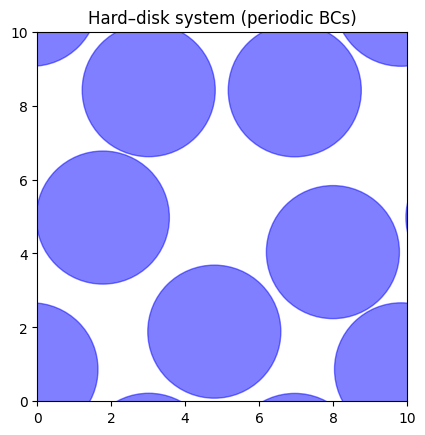

In [ ]:
sim_mc.system.plot_system()

In [ ]:
# Defining direct sampling simulations
n_steps=int(1e3)
sim_ds = PeriodicDirectSampling(system=deepcopy(sys))
run_simulation(sim_ds,n_steps)

100%|██████████| 1000/1000 [00:14<00:00, 69.52it/s]

n bins [5 5]
mean probability:  0.04
standard deviation:  0.0068
sum probabilities: 1.0


### Phase transition

In [ ]:
box_size = 10
particle_radius=0.6
n_particles=20
n_steps = int(1e5)
n_bins=int(50)

sys = HardDiskSystem(box_size=box_size, particle_radius=particle_radius, n_particles=n_particles)
sim_mc = MarkovChain(system=deepcopy(sys),delta_x=particle_radius/2)

bin_size = sim_mc.sys.box_size / (2*n_bins)
bins = np.linspace(0, sim.sys.box_size/2, n_bins + 1)
for step in sim_mc.run(eval_fn=lambda x: rdf(x,n_bins=n_bins),n_steps=n_steps):
    bins+=step

#ploting
density = n_particles / (box_size ** 2)
bins_centers = (np.linspace(0, sim.sys.box_size/2, n_bins + 1) * bin_size) + (bin_size / 2)
bins_normalization = (2 * np.pi * bins_centers * bin_size * density * n_particles * n_steps)
bins /= bins_normalization
fig, axes = plt.subplots(1,2,figsize=(20,10))
axes[0].plot(bins_centers, bins, linestyle='-')

NameError: name 'HardDiskSystem' is not defined